# 基本概念

## 网络请求
https://www.baidu.com --url 统一资源定位符       
请求讨程:      
客户端, 指web刘览器向服务器发送请求         
请求一般分为四部分:       
1. 请求网址 -- request url
2. 请求方法 -- request methods
3. 请求头 -- request header
4. 请求体 -- request body   

F12查看响应

## 爬虫的概念
模拟浏览器,发送请求, 获取响应         
只能获取客户端所展示出来的数据

特点: 知识碎片化      
在写爬虫的时候会面对各种各样的网站，每个网站都是有区别的    

模拟客户端, 操作者是正常的用户          
模拟用户发送请求       

爬虫 -- 模拟客户端访问，抓取数据        
反爬 -- 保护重要数据, 阻止恶意网络攻击      
……

## 爬虫的分类
爬虫作用         
1. 数据采集
2. 软件测试
3. 抢票
4. 网络安全
5. web漏洞扫描 
根据爬取网站的数量, 可以分为:通用爬虫和聚焦爬虫

## 基本流程
流程: url(网址资源定位符) --> 对url发送网络请求,获取网络请求的响应 --> 解析响应,提取数据 -->保存数据
1. 确认目标
2. 发送请求
3. 提取数据 jsonpath/xpath/re
4. 保存数据 本地 or 数据库

## robots协议
非义务
 

# 网络请求

## 网络通信步骤
电脑（浏览器）: url -- www, baidu.com 域名          
DNS服务器:ip地址标注服务器 -- 1.1.1.1 IP地址        
DNS服务器返回ip地址给浏览器       
浏览器拿到ip地址去访问服务器, 返回响应       
服务器返回给我们的响应数据, html/css/js/jpg...    

百度首页：实际上由很多部分组成起来       
html: 文本       
css:样式，控制文字大小、颜色             
js: 行为, 包括鼠标点击               
jpg: 图片          

网络通信的实际原理:              
一个请求www.baidu.com 只能对应一个数据包（文件）
之后抓包可能会有很多个数据包，共同组成了这个页面   

## http协议和https协议
http协议: 规定了服务器和客户端互相通信的规则                

概念和区别       
http协议: 超文本传输协议，默认端口号是80          
超文本：包括图片、音频、视频          
传输协议: 指使用共用约定的固定格式来传道转换成字符事的超文本内容            

https协议: http+ ssl(安全套接字层) 默认端口号是443           
ssl对传输的内容进行加密        
https比http更安全, 但是性能更低        

http请求/响应的步骤:      
1. 客户端连接到web服务器
2. 发送http请求
3. 服务器接受请求返回响应
4. 释放连接 tcp 连接
5. 客户端解析 html 内容

## 请求头
url的格式:          
形式:scheme://host[:port#]/path/.../[?query-string][#anchor]     
scheme:协议(列如:HTTP,HTTPS,ftp)      
host:服务器的ip地址或者域名         
port:服务器的端口(如果是走协议默认端口,80 or 443)      
path:访问资源的路径        

HTTP常见请求头:           
--Host(主机和端口号)         
--Connection(链接类型)       
--Upgrade-Lnsecure-requests(升级为HTTPS请求)          
--User-Agent(用户代理)：模拟正常用户            
    服务器能够识别客户使用的操作系统及版本,CPU类型,浏览器及版本,浏览器渲染引擎,浏览器语言,浏览器插件等       
--Accept(传输文件类型)         
--Referer(页面跳转处)       
--Accept-Encoding(文件编解码格式)        
--Cookie(Cookie)        
--x-requested-with:         
    XMLHTTPRequest 是Ajax异步请求             

get与post方法          
get方法:         
用来请求资源        
在url中传输实体数据          
传输的数据量小         
post方法：     
向服务器提交资源         

响应状态码(status code) ,常见的状态码:          
200:成功          
302:临时转移至新的url          
307:临时转移至新的url        
404;找不到该页面
500:服务器内部错误         
503:服务不可用,一般是被反爬  

## 字符串编译码
图片、音频、视频需要以bytes格式保存

In [8]:
name='纯洁的少年'
print(name,type(name))
name2=name.encode() # 编码为2进制
print(name2,type(name2))
name3=b'rc8293' # 二进制格式;只能编码ASCII字符
print(name3,type(name3))
name4=name2.decode() # 解码
print(name4,type(name4))

纯洁的少年 <class 'str'>
b'\xe7\xba\xaf\xe6\xb4\x81\xe7\x9a\x84\xe5\xb0\x91\xe5\xb9\xb4' <class 'bytes'>
b'rc8293' <class 'bytes'>
纯洁的少年 <class 'str'>


# request库的基本使用

## 基本使用
request模块作用：发送http请求，获取响应数据         


In [13]:
import requests
# 目标url
url = 'https://ww.baidu.com'
# 向url发送请求-get请求
response = requests.get(url)
print(response) # 200为状态码
# 打印响应
print(response.text) # 响应内容存在乱码；requests模板自动识别解码
print(response.content.decode()) # .content二进制内容

<Response [200]>
<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=http://s1.bdstatic.com/r/www/cache/bdorz/baidu.min.css><title>ç¾åº¦ä¸ä¸ï¼ä½ å°±ç¥é</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus></span><span class="bg s_b

## 使用requests库保存图片

In [18]:
import os
# url：在网络上随便找一张图片的url（F12 -- network header -- request url ）
url = 'https://greeksoftinstitute.files.wordpress.com/2016/07/111.png'
res = requests.get(url)
# 图片保存路径
save_folder_image = r'C:\Users\Administrator\Pictures' # \U有歧义，所以加原始编译符r
image_name = 'smile.jpg'
save_path = os.path.join(save_folder_image, image_name)
# 保存图片
with open(save_path,'wb') as f:
    f.write(res.content)

## 其他属性
response.text 和response.content的区别:           
text: str类型, requests模块自动根据http头部对响立的编码作出有根据的推测        
content: bytes类型, 可以通过decode()解码      

当然，我们也可以直接指定response的编码方式    

常用的属性或方法       
response.url 响应的url; 有时候响应的url和请求的url并不一致            
response.status_code 响应状态码          
response.request.headers 响应对应的请求头          
response.headers 响应头          
response.request._cookies 响应对应请求的cookie; 返回cookieJar 类型        
response.cookies 响应的cookie（经过了 set-cookie动作; 返回 cookieJar类型          

In [20]:
response.encoding = 'utf-8'
print(response.text)

<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=http://s1.bdstatic.com/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus></span><span class="bg s_btn_wr"><input type=submit id=su val

## 用户代理
我们会发现，response的内容少于网页的内容；      
请求头中user-agent字段必不可少（表示客户端操作系统以及浏览器的信息）         
添加user-agent是为了伪装浏览器发送请求

<!DOCTYPE html><!--STATUS OK--><html><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta content="always" name="referrer"><meta name="theme-color" content="#ffffff"><meta name="description" content="全球领先的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"><link rel="shortcut icon" href="https://www.baidu.com/favicon.ico" type="image/x-icon" /><link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" /><link rel="icon" sizes="any" mask href="https://www.baidu.com/favicon.ico"><link rel="dns-prefetch" href="//dss0.bdstatic.com"/><link rel="dns-prefetch" href="//dss1.bdstatic.com"/><link rel="dns-prefetch" href="//ss1.bdstatic.com"/><link rel="dns-prefetch" href="//sp0.baidu.com"/><link rel="dns-prefetch" href="//sp1.baidu.com"/><link rel="dns-prefetch" href="//sp2.baidu.com"/><link rel="dns-prefetch" href="//pss.bdstatic.com"/><link rel="apple-touch-
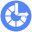

In [22]:
# 构建请求头
headers = {
'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'
}
# 发送请求
url = 'https://ww.baidu.com'
# headers参数接收字典形式的请求头
response = requests.get(url,headers=headers)
print(response.content.decode()) # 就会多很多内容

## user-agent池
防反爬      
当同一用户请求次数过多时，可能会被识别    
我们需要构建user-agent池，从中随机调取不同用户

In [25]:
import random
# 构造随机函数，来生成user-agent
def get_ua():
    first_num = random.randint(55, 76)
    third_num = random.randint(0, 3800)
    fourth_num = random.randint(0, 140)
    os_type = ['(Windows NT 6.1; WOW64)', '(Windows NT 10.0; WOW64)', '(X11; Linux x86_64)', '(Macintosh; Intel Mac OS X 10_14_5)']
    chrome_version = 'Chrome/{}.0.{}.{}'.format(first_num, third_num, fourth_num)
    ua = ' '.join(['Mozilla/5.0', random.choice(os_type), 'AppleWebKit/537.36', '(KHTML, like Gecko)', chrome_version, 'Safari/537.36'])
    return ua

# 调用
get_ua()

'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.1669.88 Safari/537.36'

In [26]:
# 有的模块有生成user-agent的函数
from fake_useragent import UserAgent
print(UserAgent().random)

Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Mobile Safari/537.36


## 浏览器发送请求原理
1. 构建请求
2. 查找缓存
3. 准备ip地址和端口
4. 等待tcp队列
5. 建立tcp连接
6. 发送http请求

## url传参及转译
字符串被当作url提交时会自动进行url编码处理         
eg:     
    搜索'学习'时：url：https://www.google.com/search?q=%E5%AD%A6%E4%B9%A0&oq=%E5%AD%A6%E4%B9%A0            
    输入：学习             明文           
    输出：%E5%AD%A6%E4%B9%A0            密文

In [31]:
from urllib.parse import quote, unquote
# quote 明文转密文 传入str
# unquote 密文转明文  传入%%
print(quote('学习'))
print(unquote('%E5%AD%A6%E4%B9%A0'))

%E5%AD%A6%E4%B9%A0
学习


In [ ]:
## 发送带参数的请求
params 参数携带参数字典

<!doctype html><html lang="zh-TW"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>学习 - Google 搜尋</title><script nonce="OVvz2SbESF3GFnp4PCyqFQ">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}win
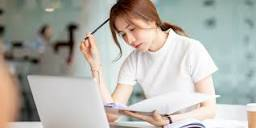
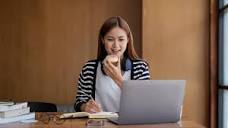
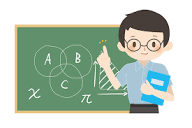

In [32]:
url_q = 'https://www.google.com/search?q=%E5%AD%A6%E4%B9%A0'
headers = {
'User-Agent':get_ua()
}
res = requests.get(url_q,headers=headers)
print(res.content.decode())

<!doctype html><html lang="zh-TW"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>python - Google 搜尋</title><script nonce="MURy66hxKxCMGNhURgU9Tg">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}
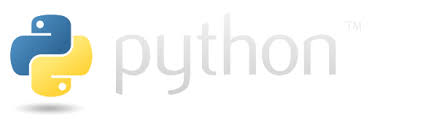
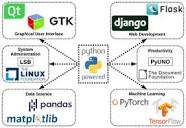

In [33]:
url = 'https://www.google.com/search?'
# 构建请求参数字典
param = {'q':'python'}
res2 = requests.get(url,headers=headers,params=param)
print(res2.content.decode())

请输入关键字： 上海交通大学


<!doctype html><html lang="zh-TW"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>上海交通大学 - Google 搜尋</title><script nonce="HE6rf1DRk3tiQHkTAnHlKw">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}
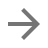
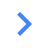

In [36]:
name = input('请输入关键字：')
# 构建请求参数字典
param = {'q':name}
res2 = requests.get(url,headers=headers,params=param)
print(res2.content.decode())